In [1]:
import os
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import shap

/Users/marinawyss/Desktop/code/MLProject/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = pd.DataFrame()

for i in range(0, 10):
    new = pd.read_csv(f"x_{i}.csv")
    X = pd.concat([X, new])

In [3]:
shap_values = np.load('shap_values_0.npy')

for i in range(1, 10):
    new = np.load(f'shap_values_{i}.npy')
    shap_values = np.concatenate([shap_values, new])

In [45]:
def plot_interaction_dependence_plot(main_var, interaction, var_name):
    
    # set up image and axes
    fig = plt.figure(figsize=(12, 12))

    gs = gridspec.GridSpec(5, 5)
    ax_main = plt.subplot(gs[1:5, :4])
    ax_xDist = plt.subplot(gs[0, :4])
    ax_yDist = plt.subplot(gs[1:5, 4])

    # lowess
    idx = np.where(X.columns==main_var)[0][0]

    public = X.loc[X['public'] == 1]
    private = X.loc[X['public'] == 0]

    shap_public = shap_values[public.index]
    shap_private = shap_values[private.index]

    x_pub = public.iloc[:,idx]
    y_sv_pub = shap_public[:,idx]
    lowess_pub = sm.nonparametric.lowess(y_sv_pub, x_pub)

    x_pri = private.iloc[:,idx]
    y_sv_pri = shap_private[:,idx]
    lowess_pri = sm.nonparametric.lowess(y_sv_pri, x_pri)

    ax_main.plot(*list(zip(*lowess_pub)), color="red", linestyle="dashed", )
    ax_main.plot(*list(zip(*lowess_pri)), color="blue", linestyle="dashed", )

    # shap
    shap.dependence_plot(
        main_var,
        shap_values,
        X,
        interaction_index=interaction,
        alpha=0.5,
        dot_size=10,
        show=False,
        ax=ax_main
    )

    # remove color bar and left y-axis title
    plt.delaxes(fig.axes[3])

    # add legend and labels
    ax_main.legend(['public', 'private'], fontsize=12, loc='upper right')
    ax_main.set_xlabel(var_name, fontsize=14)
    ax_main.set_ylabel('Sector', fontsize=14)

    # histplots
    ax_xDist.hist(X[main_var], bins=50, edgecolor="black", color="gray")
    ax_yDist.hist(X[interaction], orientation="horizontal", bins=50, edgecolor="black", color="gray")

    plt.show()

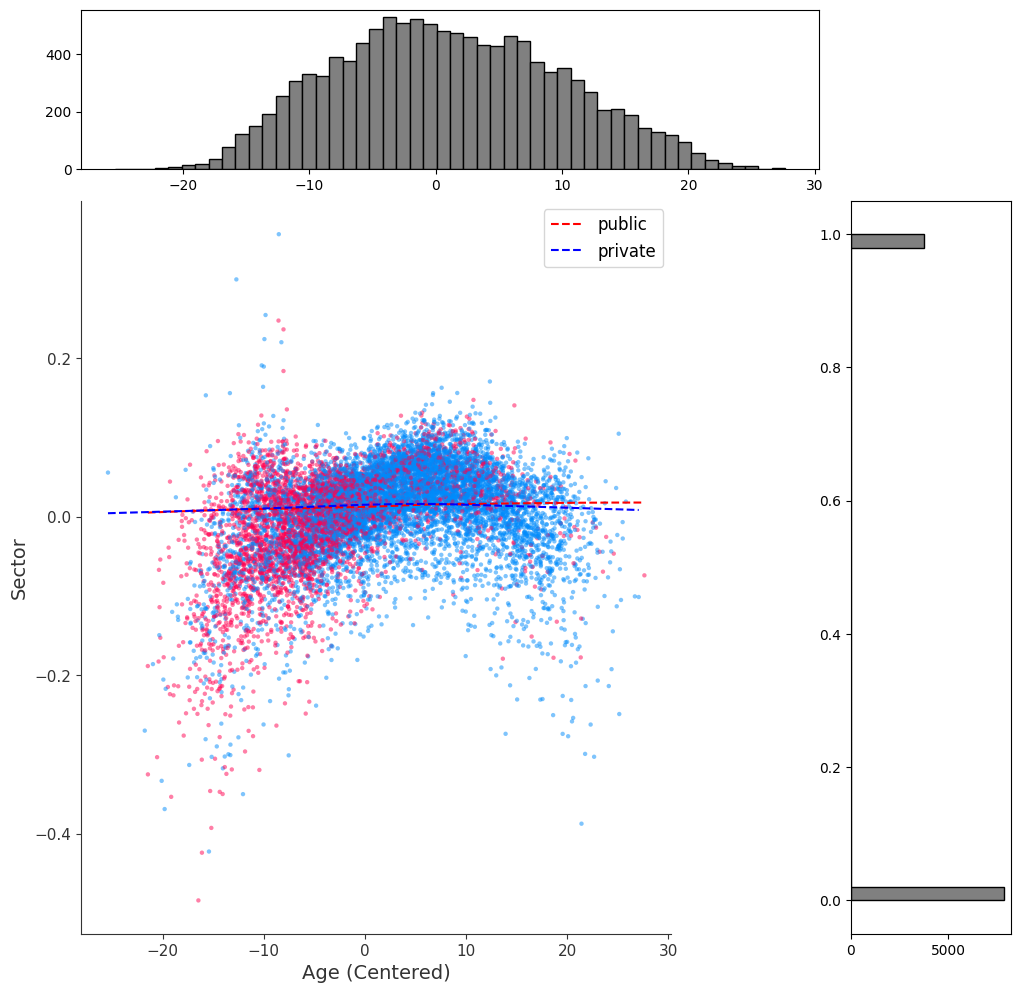

In [46]:
plot_interaction_dependence_plot(
    main_var = 'avg_age_per_job_centered',
    interaction = 'public',
    var_name = 'Age (Centered)')

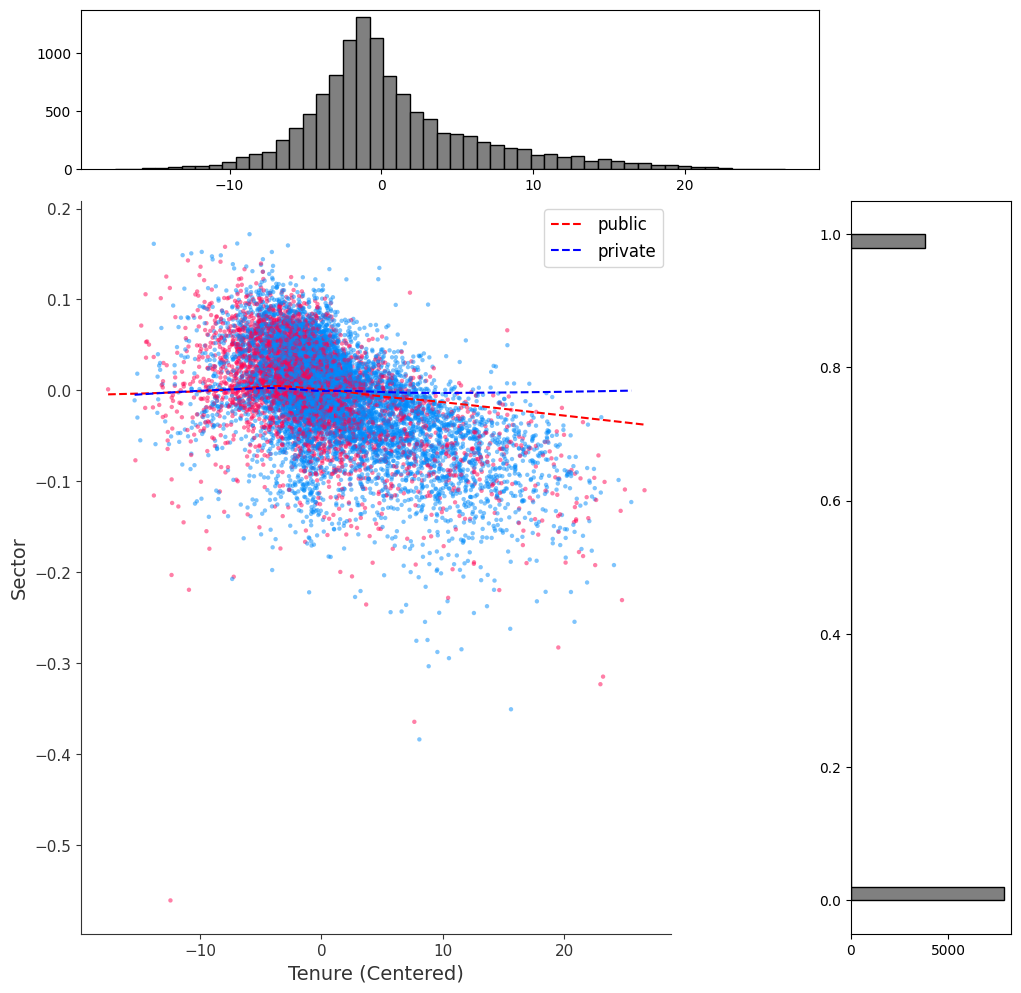

In [47]:
plot_interaction_dependence_plot(
    main_var = 'tenure_centered',
    interaction = 'public',
    var_name = 'Tenure (Centered)')